**Homework 4 Template**

Make a copy of this and save as "hw4_name.ipynb"

Name: Jamison Wolsborn

Comments for instructor:


**Exercise 5.7**

Consider the integral

\begin{equation*}
I = \int_0^1 \sin^2 \sqrt{100 x} \>d x
\end{equation*}

**a)** Write a program that uses the adaptive trapezoidal rule method of
  Section 5.3 and Eq. (5.34) to calculate the value of this integral to an
  approximate accuracy of $\epsilon=10^{-6}$ (i.e., correct to six digits
  after the decimal point).  Start with one single integration slice and
  work up from there to two, four, eight, and so forth.  Have your program
  print out the number of slices, its estimate of the integral, and its
  estimate of the error on the integral, for each value of the number of
  slices $N$, until the target accuracy is reached.  (Hint: You should find
  the result is around $I=0.45$.)

In [96]:
import numpy as np

#initialize variables
N = 1
I1 = 0
I2 = 0
#define bounds
a = 0 
b = 1

#trapezoidal rule from textbook
def trap_rule(N):
    #inner function
    f = lambda x: np.sin(np.sqrt(100*x))**2
    h = (b-a)/N
    
    #integral without h
    s = 0.5*f(a) + 0.5*f(b)
    for k in range(1,N):
        s += f(a+k*h)
    
    #adding h 
    return h*s

#defining error
error = 1

#while error is greater than 1e-6 keep doubling N until error is correct
while error > 1e-6: 
    I1 = trap_rule(N)
    I2 = trap_rule(N*2)
    error = abs((1/3) * (I2 - I1))
    Integral = I2 + error
    print("N = {:4} || Integral = {:5f} || Error = {:.3e}".format(N,Integral,error))
    N *= 2

N =    1 || Integral = 0.384316 || Error = 5.908e-02
N =    2 || Integral = 0.574633 || Error = 6.235e-02
N =    4 || Integral = 0.439426 || Error = 3.643e-02
N =    8 || Integral = 0.439139 || Error = 9.035e-03
N =   16 || Integral = 0.454518 || Error = 6.104e-03
N =   32 || Integral = 0.455746 || Error = 1.833e-03
N =   64 || Integral = 0.455827 || Error = 4.785e-04
N =  128 || Integral = 0.455832 || Error = 1.209e-04
N =  256 || Integral = 0.455833 || Error = 3.031e-05
N =  512 || Integral = 0.455833 || Error = 7.583e-06
N = 1024 || Integral = 0.455833 || Error = 1.896e-06
N = 2048 || Integral = 0.455833 || Error = 4.740e-07


**Pts /10**

**b)** Now modify your program to evaluate the same integral using the
  Romberg integration technique described in this section.  Have your
  program print out a triangular table of values, as on page 161, of all
  the Romberg estimates of the integral.  Calculate the error on your
  estimates using Eq. (5.49) and again continue the calculation until you
  reach an accuracy of $\epsilon=10^{-6}$.  You should find that the
  Romberg method reaches the required accuracy considerably faster than the
  trapezoidal rule alone.

In [112]:
N = 1

R = np.zeros((100,100))
R[0,0] = trap_rule(N) 

#initialize error value
error = 1
i = 0

while error > 1e-6:
    #double the value of N for every row in the first column
    N *= 2
    i += 1
    
    #initialize first column of integrals based off of trapezoid rule
    I1 = R[i-1,0]
    I2 = trap_rule(N)
    R[i,0] = I2
    
    #apply equation 5.51 to every pertinent column in the row
    for m in range(i):
        R[i,m+1] =R[i,m] + 1/(4**(m+1)-1)*(R[i,m] - R[i-1,m]) #equation 5.51
    
    error = abs(R[i,m+1]-R[i-1,m]) 

#far too complicated print statement to remove all the zeros    
j = 1
for line in R:
    if line[0] != 0:
        print(line[:j])
        j+=1

[0.14797948]
[0.32523191 0.38431605]
[0.51228285 0.57463317 0.58732097]
[0.40299745 0.36656898 0.35269804 0.34897386]
[0.43010337 0.43913868 0.44397666 0.44542552 0.44580376]
[0.44841467 0.45451843 0.45554375 0.45572735 0.45576775 0.45577749]
[0.45391293 0.45574569 0.4558275  0.45583201 0.45583242 0.45583248
 0.45583249]
[0.4553485  0.45582703 0.45583245 0.45583253 0.45583253 0.45583253
 0.45583253 0.45583253]


As we can see, the romberg equation did the same calculation with only 8 iterations instead of the 12 that it took with the adapted trapezoid method. 

**Pts /10**

**Total Exercise Pts /20**

**Exercise 5.9**

Debye's theory of solids gives the heat capacity of a solid at
temperature $T$ to be

\begin{equation*}
C_V = 9V\rho k_B \biggl( {T\over\theta_D} \biggr)^3 \int_0^{\theta_D/T}
      {x^4 e^x\over(e^x-1)^2}\>d x,
\end{equation*}

where $V$ is the volume of the solid, $\rho$ is the number density of
atoms, $k_B$ is Boltzmann's constant, and $\theta_D$ is the so-called
_Debye temperature_, a property of solids that depends on their
density and speed of sound.

**a)** Write a Python function _cv(T)_ that calculates $C_V$ for a
  given value of the temperature, for a sample consisting of 1000 cubic
  centimeters of solid aluminum, which has a number density of
  $\rho=6.022\times10^{28}\,\mathrm{m}^{-3}$ and a Debye temperature of
  $\theta_D=428\,$K.  Use Gaussian quadrature to evaluate the integral,
  with $N=50$ sample points.

In [1]:
from gaussxw import gaussxwab
from scipy.constants import Boltzmann
import numpy as np

alum = 6.022e28 #number density of aluminum
vol = 1000 * 1e-6 #1000 cubic centimeters to cubic meters
N = 50
ThetaD = 428 #Debeye temperature Kelvin


def cv(T):
    f = lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2
    a = 0
    b = ThetaD / T
    
    x,w = gaussxwab(N,a,b)
    
    C = 9 * vol * alum * Boltzmann * (T/ThetaD)**3
    I = sum(w*f(x))
    
    return C*I


**Pts /10**

**b)** Use your function to make a graph of the heat capacity as a function
  of temperature from $T=5\,$K to $T=500\,$K.

Text(0, 0.5, 'Heat Capacity (J/kg*K)')

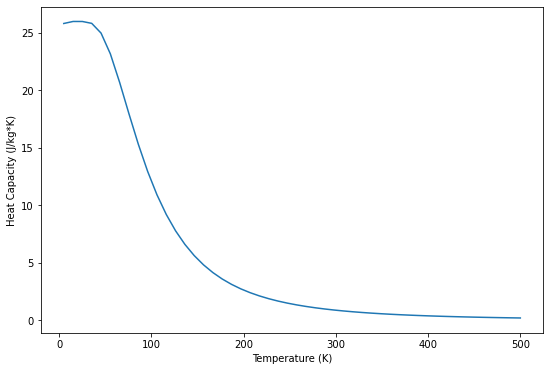

In [127]:
import matplotlib.pyplot as plt
T = np.linspace(5, 500) #temperature range
C = [cv(Ti) for Ti in T] #corresponding heat capacity for temperature

plt.figure(figsize=(9,6))
plt.plot(T,C)
plt.xlabel("Temperature (K)")
plt.ylabel("Heat Capacity (J/kg*K)")

**Pts /5**

**Total Exercise Pts /15**

**Exercise 5.12**

The Planck theory of thermal radiation tells us that in the
(angular) frequency interval $\omega$ to $\omega+d\omega$, a black body
of unit area radiates electromagnetically an amount of thermal energy per
second equal to $I(\omega)\>d\omega$, where

\begin{equation*}
  I(\omega) = {\hbar\over4\pi^2c^2}\,{\omega^3\over(e^{\hbar\omega/k_BT}-1)}.
\end{equation*}

Here $\hbar$ is Planck's constant over $2\pi$, $c$ is the speed of light,
and $k_B$ is Boltzmann's constant.

**a)** Show that the total energy per unit area radiated by a black body is

\begin{equation*}
W = {k_B^4 T^4\over4\pi^2c^2\hbar^3} \int_0^\infty {x^3\over e^x-1}\>d x.
\end{equation*}

Type your answer here or insert an image

**Pts /5**

**b)** Write a program to evaluate the integral in this expression.  Explain
  what method you used, and how accurate you think your answer is.

I chose Gaussian Quadurature not only because it was the simplest to implement, but because it was the most accurate in the past. Given my rocky history of coding, using Gaussian quadrature would introduce the least amount of human error which makes me more confident in my answer. 

In [160]:
from scipy.constants import Boltzmann, speed_of_light, Planck

N = 50 #Decided for bin size of 50
a,b = 0, 700 #from zero to as big as you can get without overflow error
x,w = gaussxwab(N,a,b)

T = 2000 #Kelvin (Arbritrary)
f = lambda x: x**3/(np.exp(x)-1) #function to get integral of

I = sum(w*f(x)) #integral of function from a to b
C = Boltzmann**4*T**4/(4*np.pi**2*speed_of_light**2*(Planck/2/np.pi)**3) #everything to the left of the integral

print(I*C) #unsure of units of this value

906812.2881749417


**Pts /10**

**c)** Even before Planck gave his theory of thermal radiation around the
  turn of the 20th century, it was known that the total energy $W$ given
  off by a black body per unit area per second followed Stefan's
  law: $W = \sigma T^4$, where $\sigma$ is the Stefan--Boltzmann constant.
  Use your value for the integral above to compute a value for the
  Stefan--Boltzmann constant (in SI units) to three significant figures.
  Check your result against the known value, which you can find in books or
  on-line.  You should get good agreement.

When I plugged it into my calculator I got 5.668e-8. This compares quite nicely to the actual value of 5.670e-8 W m^-2 K^-4

**Pts /5**

**Total Exercise Pts /20**

**Exercise 5.14**

A uniform square sheet of metal is floating motionless in space (check your textbook for an image representation). The sheet is $10\,$m on a side and of negligible thickness, and it has a mass of 10 metric tonnes.

**a)** Consider the gravitational force due to the plate felt by a point
  mass of $1\,$kg a distance $z$ from the center of the square, in the
  direction perpendicular to the sheet, as shown above.  Show that the
  component of the force along the $z$-axis is
  
\begin{equation*}
F_z = G\sigma z \iint_{-L/2}^{L/2} {d x\,d y\over(x^2+y^2+z^2)^{3/2}}\,,
\end{equation*}

where
$G=6.674\times10^{-11}\,\mathrm{m}^3\,\mathrm{kg}^{-1}\,\mathrm{s}^{-2}$ is
Newton's gravitational constant and $\sigma$ is the mass per unit area of
the sheet.

Type your answer here or insert an image

**Pts /5**

**b)** Write a program to calculate and plot the force as a function of $z$
  from $z=0$ to $z=10\,$m.  For the double integral use (double) Gaussian
  quadrature, as in Eq. (5.82), with 100 sample points along each axis.

In [161]:
from scipy.constants import gravitational_constant
az, bz = 0, 10 #from 0 to 10 meters
mass = 10 * 1000 #10 metric tonnes in kg
L = 10
A = L**2 #area of plate
sigma = mass/A


def f(x,y,z):
    return (x**2 + y**2 + z**2)**(-3/2)

x1, w1 = gaussxwab(N,ax,bx)
x2, w2 = gaussxwab(N,ay,by)

6.6743e-11


**Pts /10**

**c)** **This part is extra credit** You should see a smooth curve, except at very small values of $z$,
  where the force should drop off suddenly to zero.  This drop is not a
  real effect, but an artifact of the way we have done the calculation.
  Explain briefly where this artifact comes from and suggest a strategy to
  remove it, or at least to decrease its size.

Type your answer here

**XC Pts /5**

**Total Exercise Pts /15**

**Exercise 5.15**

Create a user-defined function _f(x)_ that returns the value
$1 + \frac{1}{2} \tanh2x$, then use a central difference to calculate the
derivative of the function in the range $-2\le x\le2$.  Calculate an
analytic formula for the derivative and make a graph with your numerical
result and the analytic answer on the same plot.  It may help to plot the
exact answer as lines and the numerical one as dots.  (Hint: In Python the
tanh function is found in the _math_ package, and it's called simply
_tanh_.)

**Total Exercise Pts /10**

**Total Pts /80**